In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Practice/Datasets/housing.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Practice/Datasets/housing.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

#Apply ordinal encoding to each specified column in the DataFrame
df['CRIM'] = enc.fit_transform(df[["CRIM"]])
df['ZN'] = enc.fit_transform(df[["ZN"]])
df['INDUS'] = enc.fit_transform(df[["INDUS"]])
df['CHAS'] = enc.fit_transform(df[["CHAS"]])
df['NOX'] = enc.fit_transform(df[["NOX"]])
df['RM'] = enc.fit_transform(df[["RM"]])
df['AGE'] = enc.fit_transform(df[["AGE"]])
df['DIS'] = enc.fit_transform(df[["DIS"]])
df['RAD'] = enc.fit_transform(df[["RAD"]])
df['TAX'] = enc.fit_transform(df[["TAX"]])
df['PTRATIO'] = enc.fit_transform(df[["PTRATIO"]])
df['B'] = enc.fit_transform(df[["B"]])
df['LSTAT'] = enc.fit_transform(df[["LSTAT"]])
df['MEDV'] = enc.fit_transform(df[["MEDV"]])

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,3.0,19.0,0.0,51.0,320.0,172.0,297.0,0.0,34.0,9.0,356.0,53.0,137.0
1,23.0,0.0,56.0,0.0,36.0,279.0,225.0,333.0,1.0,11.0,23.0,356.0,161.0,113.0
2,22.0,0.0,56.0,0.0,36.0,400.0,159.0,333.0,1.0,11.0,23.0,271.0,28.0,196.0
3,32.0,0.0,16.0,0.0,33.0,383.0,112.0,361.0,2.0,5.0,31.0,311.0,6.0,193.0
4,110.0,0.0,16.0,0.0,33.0,395.0,139.0,361.0,2.0,5.0,31.0,356.0,64.0,203.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='AGE', ylabel='Density'>

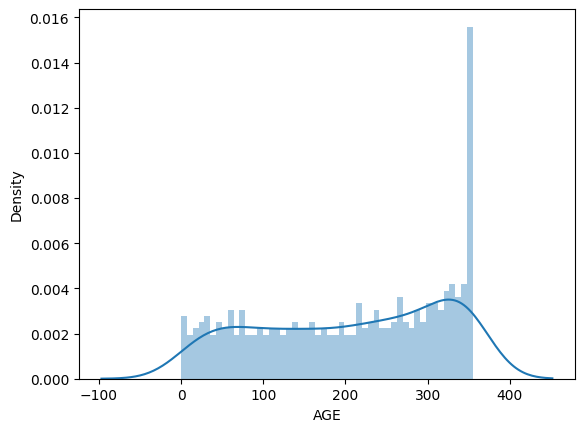

In [ ]:
sns.distplot(df['AGE'], bins=50)

<Axes: xlabel='TAX', ylabel='Density'>

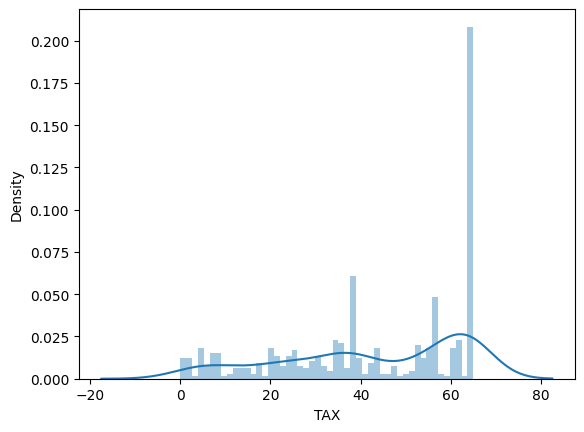

In [ ]:
sns.distplot(df['TAX'], bins=50)

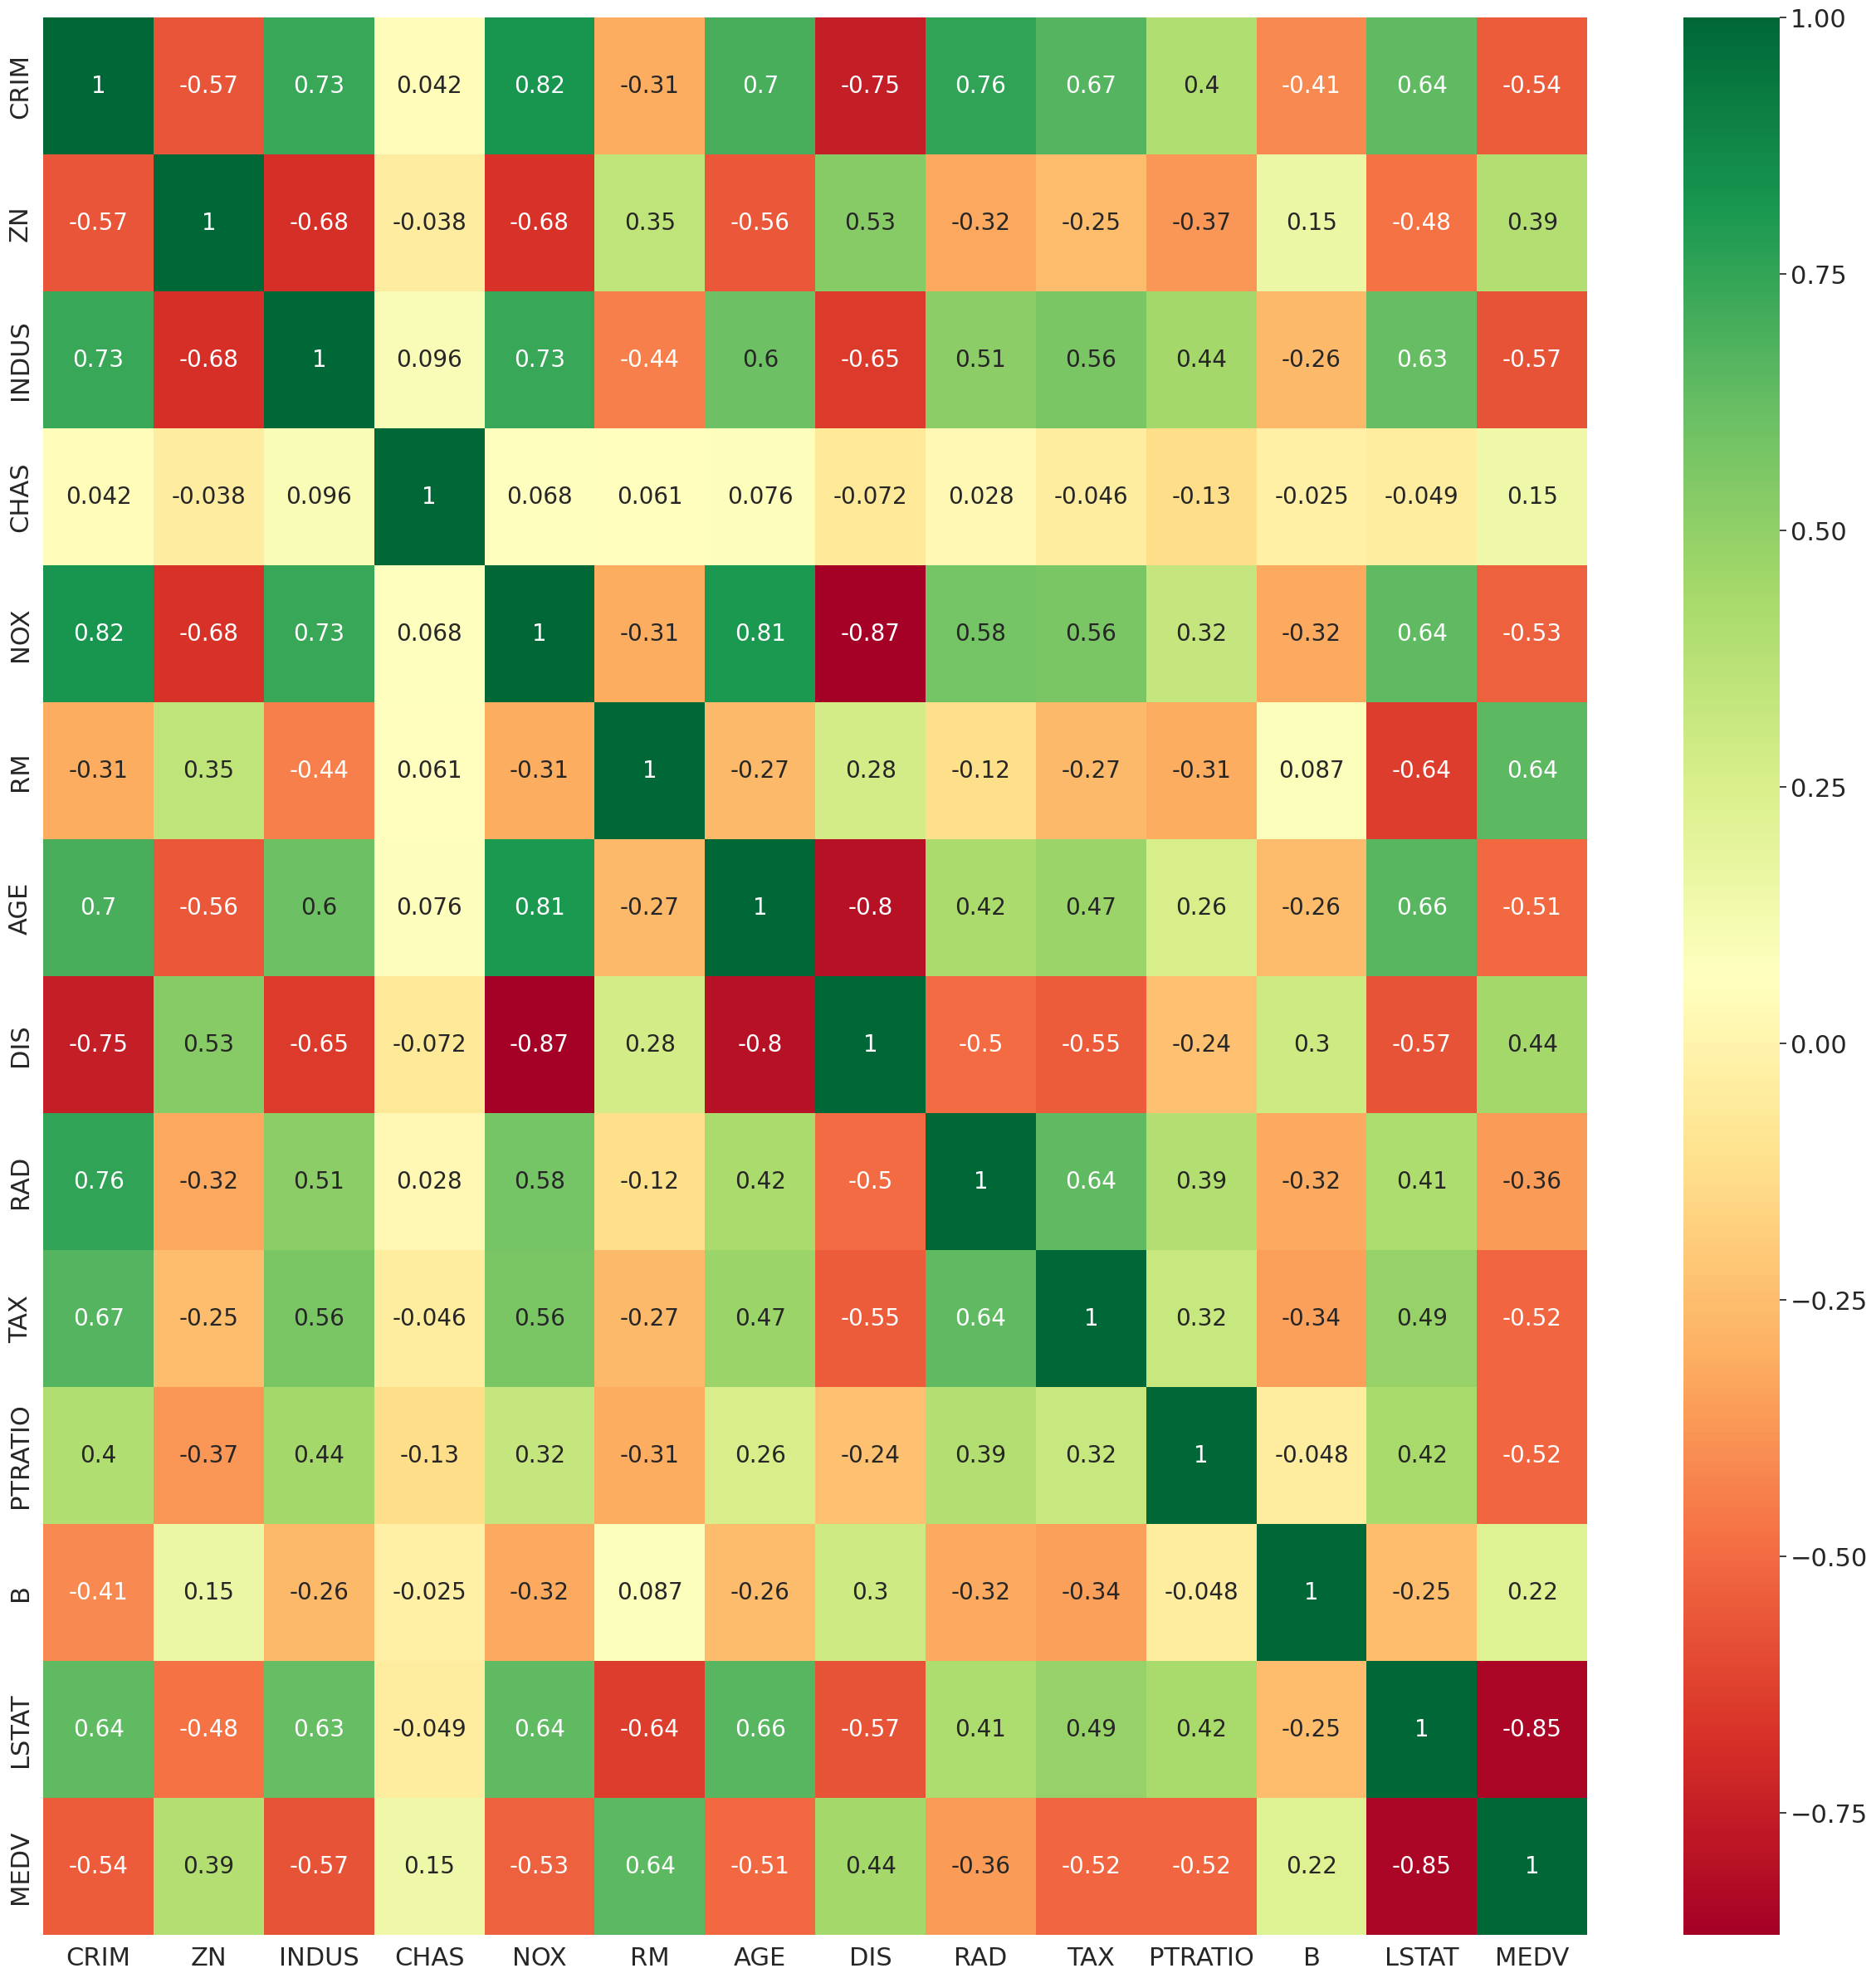

In [ ]:
sns.set(font_scale=2)

# Assuming 'df' is the DataFrame
plt.subplots(figsize=(30, 30))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})

# Display the heatmap
plt.show()

In [ ]:
x=df.drop([ 'TAX'], axis=1)
y=df[ 'TAX']

In [ ]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [ ]:
x_train

array([[0.35856574, 0.04166667, 0.66666667, ..., 1.        , 0.33333333,
        0.46929825],
       [0.34262948, 0.        , 0.29333333, ..., 0.25842697, 0.21412804,
        0.71052632],
       [0.5876494 , 0.        , 0.69333333, ..., 0.44101124, 0.08830022,
        1.        ],
       ...,
       [0.4501992 , 0.        , 0.86666667, ..., 0.38483146, 0.27152318,
        0.5745614 ],
       [0.23705179, 0.        , 0.89333333, ..., 0.89325843, 0.22516556,
        0.60526316],
       [0.0936255 , 0.        , 0.58666667, ..., 0.59550562, 0.22295806,
        0.46052632]])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

**y = Wx + b;
same as y = mx + c.
W is weight(slope) and b is bias(intercept term/constant)**

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([72.78700046,  9.58733392, 21.96546271, 33.50483949,  8.84347059,
       65.31099812, 43.16065508, 35.34643811, 37.79825113, 42.28188447,
       40.20546892, 41.41766239, 32.69078719, 65.49223784, 30.85286465,
       37.55313517, 40.59303131, 43.09799362, 35.7684868 , 11.94124183,
       68.83189004, 40.44223269, 35.79938472, 31.75325279, 32.24496069,
       49.90605239, 37.91973747, 50.35726595, 41.60638465, 52.51412642,
       18.94506938, 70.52299203, 44.56973401, 46.51907149, 42.88568653,
       69.79669562, 65.3270428 , 71.55314621, 39.03984028, 18.34705782,
       37.69301249, 43.23212674, 69.48784969, 39.94579442, 28.97321876,
       42.50404979, 67.24895924, 13.178315  , 45.46754868, 54.20672631,
       28.619165  , 45.73719261, 31.56270887, 26.95392848,  9.62205934,
       29.41755651, 55.91732443, 29.27053079, 39.41397364, 67.40026671,
       23.01790088, 34.91880374, 20.72353805, 33.35637117, 69.34867843,
       32.1510032 , 65.92781417, 28.34385472, 36.1805422 , 38.93

In [ ]:
y_test

418    64.0
181     2.0
197    42.0
187    55.0
186     2.0
       ... 
145    57.0
86     15.0
390    64.0
280     4.0
189    55.0
Name: TAX, Length: 102, dtype: float64

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [ ]:
R2 = r2_score(y_pred, y_test)
R2

0.44562428745124993

In [ ]:
MSE = mean_squared_error(y_pred, y_test)
MSE

146.22457222072313

In [ ]:
RMSE= math.sqrt(MSE)
RMSE

12.092335267462738

In [ ]:
MAE= mean_absolute_error(y_pred, y_test)
MAE

9.641789436308267